In [49]:
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv("train.tsv", delimiter = '\t', quoting = 3)

In [51]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [52]:
print(df['SentenceId'].unique())
print(df['PhraseId'].unique())
print(df['Sentiment'].unique())

[   1    2    3 ... 8542 8543 8544]
[     1      2      3 ... 156058 156059 156060]
[1 2 3 4 0]


In [53]:
df['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [54]:
df['Phrase'][1]

'A series of escapades demonstrating the adage that what is good for the goose'

In [55]:
dis = df.groupby(['Sentiment']).size()
print(dis.keys())
print(dis.values)

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Sentiment')
[ 7072 27273 79582 32927  9206]


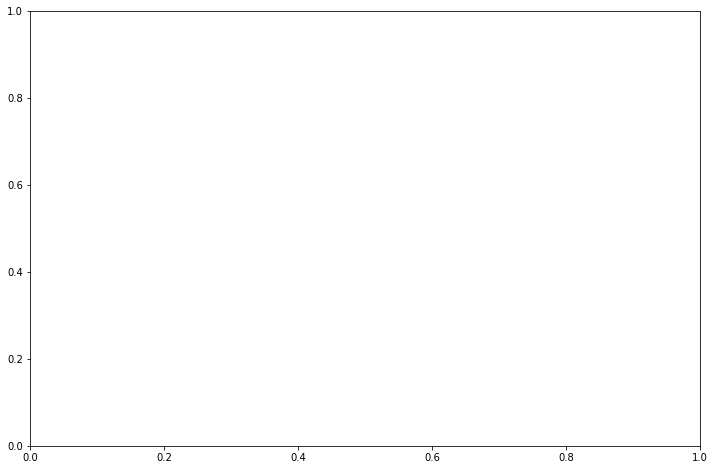

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize = (12,8))

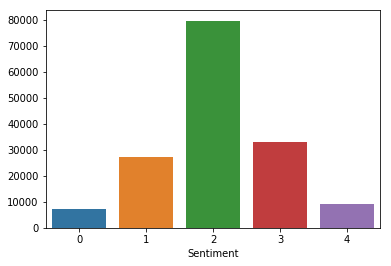

In [57]:
sns.barplot(dis.keys(),dis.values)

In [58]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
print(df['Phrase'][0])
nltk.download('stopwords')

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Majith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
corpus = []

c = df['SentenceId'].unique()
n = c[-1]
review = re.sub('[^a-zA-Z]',' ',df['Phrase'][0]) 
review = review.lower()
review = review.split()
print(review)

['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story']


In [60]:
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]


In [48]:
review = ' '.join(review)
corpus.append(review)
print(corpus)

['seri escapad demonstr adag good goos also good gander occasion amus none amount much stori']


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
print(x)

[[1 1 1 1 1 1 1 2 1 1 1 1 1 1]]
